In [1]:
#import Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the dataset
inp0 = pd.read_csv("application_data.csv")


In [4]:
#inp1 = pd.read_csv("previous_application.csv")

In [5]:
#print the head of the data frame
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
inp0.shape

(307511, 122)

In [7]:
#printing information inp0
inp0.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
#checking null values in inp0
inp0.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [9]:
#drop those columns which contain more than 50% null values
inp0 = inp0.loc[:,inp0.isnull().mean()<=0.5]

In [10]:
#checking columns are drop or not
inp0.shape

(307511, 81)

In [11]:
#inp1.head()

In [12]:
#inp1.shape

In [13]:
#inp1.info()

In [14]:
#checking 13% less or equal to 13% null values for imputation
inp0[inp0.columns[(inp0.isnull().mean()<=0.13) & (inp0.isnull().mean()>0)]]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,1.0,0.681632,0.0,0.0,0.0,0.0,-273.0
307507,12001.5,225000.0,Unaccompanied,1.0,0.115992,0.0,0.0,0.0,0.0,0.0
307508,29979.0,585000.0,Unaccompanied,1.0,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,20205.0,319500.0,Unaccompanied,2.0,0.514163,0.0,0.0,0.0,0.0,-322.0


### Checking Value For Imputation

In [15]:
#AMT_ANNUITY

In [16]:
inp0.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [17]:
#WE can check outliners for this

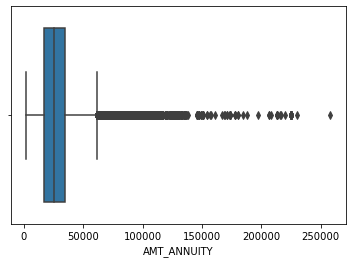

In [18]:
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

In [19]:
#here we observe outliers in this condition we can impute it from median
impu = inp0.AMT_ANNUITY.value_counts().median()
impu

7.0

In [20]:
#EXT_SOURCE_2
inp0.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

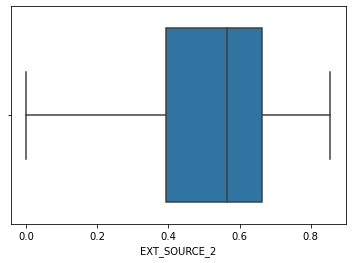

In [21]:
sns.boxplot(inp0.EXT_SOURCE_2)
plt.show()

In [22]:
#here we not found any outliers so we can impute it with mean
impu = inp0.EXT_SOURCE_2.value_counts().mean()
impu

2.5606979829927146

In [23]:
#NAME_TYPE_SUITE
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [24]:
#as we see it is categorial so we can impute it mode
impu = inp0.NAME_TYPE_SUITE.value_counts().mode()
impu

0       271
1       866
2      1770
3      3267
4     11370
5     40149
6    248526
dtype: int64

In [25]:
#AMT_GOODS_PRICE
inp0.AMT_GOODS_PRICE.value_counts()


450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

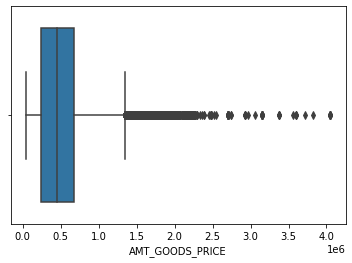

In [26]:
#checking for outliners
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

In [27]:
#impute with median because we have outliners
impu=inp0.AMT_GOODS_PRICE.value_counts().median()
impu

1.0

In [28]:
#CNT_FAM_MEMBERS
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

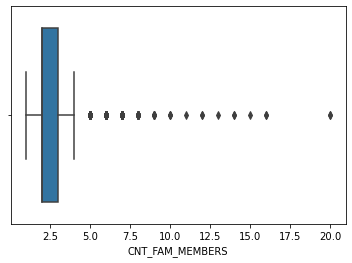

In [29]:
#checking outliners
sns.boxplot(inp0.CNT_FAM_MEMBERS)
plt.show()

In [30]:
#impute with median
impu = inp0.CNT_FAM_MEMBERS.value_counts().median()
impu

6.0

### Datatype

In [31]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [32]:
inp0.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [33]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#converting int64
Convert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
inp0.loc[:,Convert]=inp0.loc[:,Convert].apply(lambda col: col.astype('int',errors='ignore'))

In [35]:
Convert = inp0.select_dtypes(include='object').columns
Convert

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [36]:
inp0.loc[:,Convert]=inp0.loc[:,Convert].apply(lambda col: col.astype('str'))


In [37]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#checking values in CODE_GENDER
inp0.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
inp0 = inp0[inp0['CODE_GENDER']!='XNA']

In [40]:
inp0.head(30)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
inp0['CODE_GENDER'].replace(['M','F'],['Male','Female'], inplace=True)

In [42]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
### Creating bukects for columns to analysis
inp0.AMT_INCOME_TOTAL.quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:

inp0['INCOME_GROUP'] = pd.qcut(inp0['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1], labels=['verylow','low','medium','high','veryhigh']) 

In [45]:
#For DAYS_BIRTH we can create column name age

In [46]:
inp0['AGE']=abs(inp0['DAYS_BIRTH'])//365

In [47]:
inp0.AGE.describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [48]:
inp0['AGE_GROUP'] = pd.cut(inp0['AGE'], bins=np.arange(20,71,5))

In [49]:
inp0['CREDIT_INCOME_RATIO']=round((inp0['AMT_CREDIT']/inp0['AMT_INCOME_TOTAL']))

In [50]:
inp0['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=inp0['DEF_30_CNT_SOCIAL_CIRCLE']/inp0['OBS_30_CNT_SOCIAL_CIRCLE']

In [51]:
inp0['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=inp0['DEF_60_CNT_SOCIAL_CIRCLE']/inp0['OBS_60_CNT_SOCIAL_CIRCLE']

### Checking For Imbalance in Target

In [52]:
inp0.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

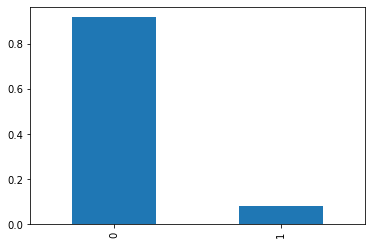

In [53]:
inp0.TARGET.value_counts(normalize=True).plot.bar()
plt.show()

In [54]:
#here, we can see non-default=0,default=1
#more people didn't default as opposed to who default
#we found here imbalance

In [55]:
#for further analysis
#we can selected 30 columns based on their discription
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [56]:
newinp0=inp0[FinalColumns]

In [57]:
newinp0.shape

(307507, 30)

In [58]:
#we splitting the dataframe into 2 separate dataframe
ndefault = newinp0[newinp0.TARGET==0]
default = newinp0[newinp0.TARGET==1]

In [59]:
ndefault.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,INCOME_GROUP,AGE_GROUP,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,...,ORGANIZATION_TYPE,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_CONTRACT_TYPE,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
1,100003,0,Female,N,N,veryhigh,"(40, 45]",1293502.5,270000.0,5.0,...,School,0.0,0.0,0.0,0.0,0.0,Cash loans,35698.5,1,1129500.0
2,100004,0,Male,Y,Y,verylow,"(50, 55]",135000.0,67500.0,2.0,...,Government,NaN,NaN,0.0,0.0,0.0,Revolving loans,6750.0,2,135000.0
3,100006,0,Female,N,Y,medium,"(50, 55]",312682.5,135000.0,2.0,...,Business Entity Type 3,0.0,0.0,NaN,NaN,NaN,Cash loans,29686.5,2,297000.0
4,100007,0,Male,N,Y,medium,"(50, 55]",513000.0,121500.0,4.0,...,Religion,NaN,NaN,0.0,0.0,0.0,Cash loans,21865.5,2,513000.0
5,100008,0,Male,N,Y,low,"(45, 50]",490495.5,99000.0,5.0,...,Other,NaN,NaN,0.0,0.0,1.0,Cash loans,27517.5,2,454500.0


### Univariate 

In [60]:
?sns.barplot

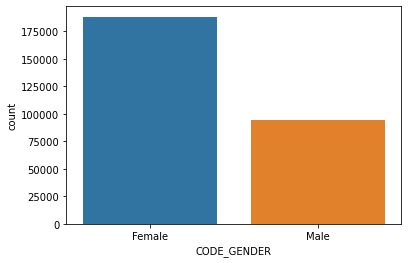

In [61]:
#NON-Defaulters
sns.countplot(data=ndefault, x='CODE_GENDER')
plt.show()

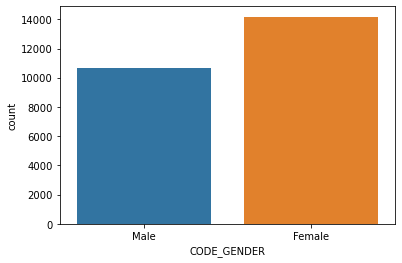

In [62]:
#Defaulter
sns.countplot(data=default, x='CODE_GENDER')
plt.show()

In [63]:
#here, we can see that female contribute more than male in non-defaulter.
#but rate of defaulting of female is lower compared to their male counterparts.

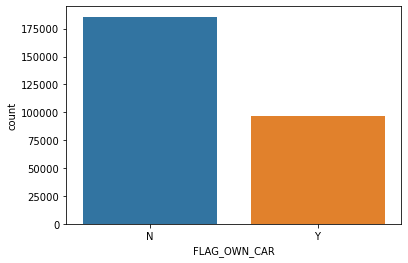

In [64]:
#Flag_own_car for ndefaluter
sns.countplot(data=ndefault, x='FLAG_OWN_CAR')
plt.show()

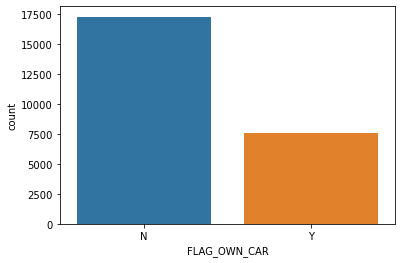

In [65]:
#for defaulter
sns.countplot(data=default, x='FLAG_OWN_CAR')
plt.show()

In [66]:
#Looking charts we can clearly conclude that the rate of default of people having car is low compared to people who don't

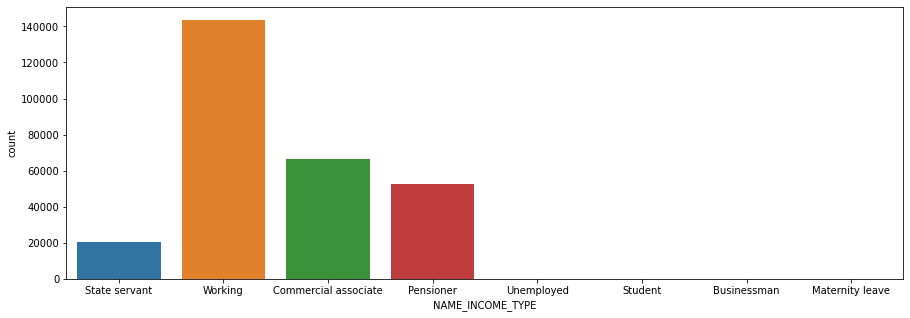

In [67]:
#NAME_INCOME_TYPE FOR NON-DEFALUTER
plt.figure(figsize=[15,5])
sns.countplot(data=ndefault, x='NAME_INCOME_TYPE')
plt.show()

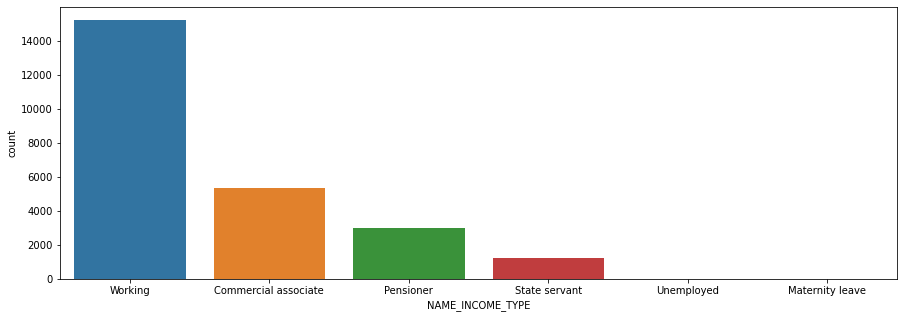

In [68]:
#FOR DEFAULTER\
plt.figure(figsize=[15,5])
sns.countplot(data=default, x='NAME_INCOME_TYPE')
plt.show()

In [69]:
#here we can see that student never default
#and also businessman
#default is done by working class people

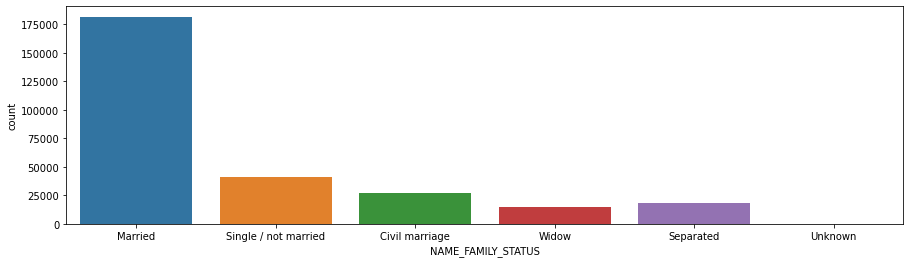

In [70]:
#NAME_FAMILY_STATUS FOR NON_DEFAULTER
plt.figure(figsize=[15,4])
sns.countplot(data=ndefault, x='NAME_FAMILY_STATUS')
plt.show()

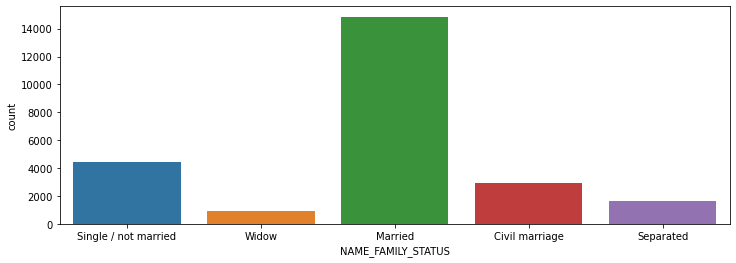

In [71]:
#FOR DEFAULTER
plt.figure(figsize=[12,4])
sns.countplot(data=default, x='NAME_FAMILY_STATUS')
plt.show()

In [72]:
#here we can see that mariried people applay more loan 

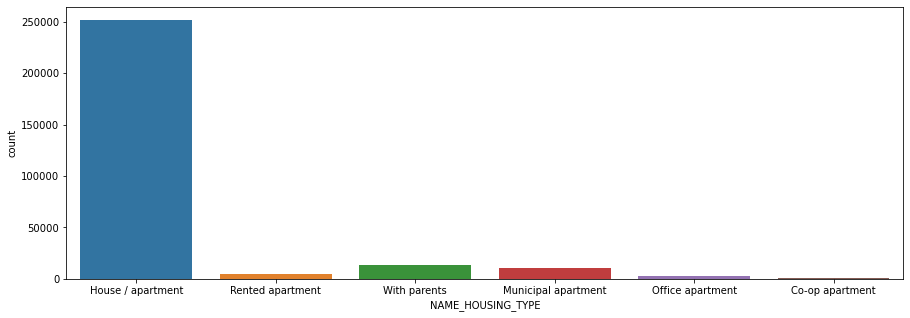

In [73]:
#NAME_HOUSING_TYPE FOR NON-DEFAULTER
plt.figure(figsize=[15,5])
sns.countplot(data=ndefault, x='NAME_HOUSING_TYPE')
plt.show()

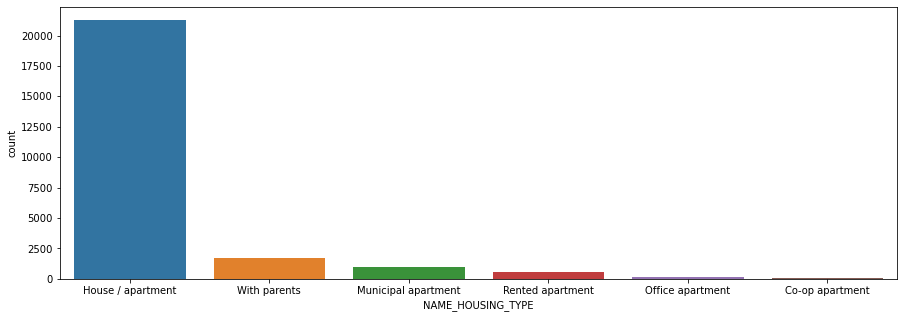

In [74]:
#FOR DEFAULTER
plt.figure(figsize=[15,5])
sns.countplot(data=default, x='NAME_HOUSING_TYPE')
plt.show()

In [75]:
#It clear in graph that people who have house, they apply more loans

### Univariate Categorical 

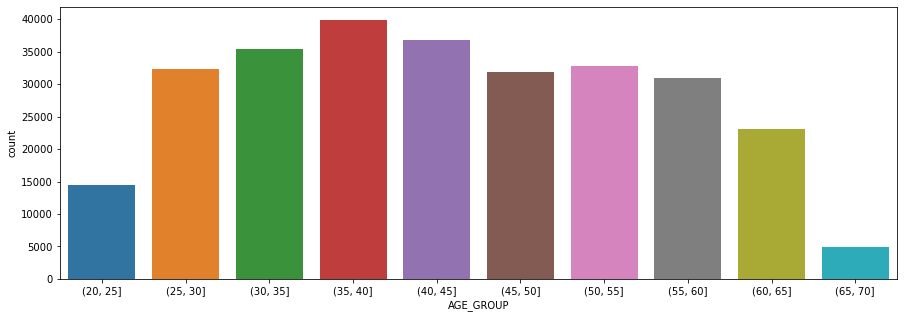

In [76]:
#Next we move to univariate categorical anaylsis
# Which age_grp are apply for more loan?  # for non-defaulter
plt.figure(figsize=[15,5])
sns.countplot(data=ndefault, x='AGE_GROUP')
plt.show()

In [77]:
#so in case of non-defaulter we can see cleary age group (35,40] are non-defaulter rate is high one of the reason is that they people get employed around the age of 35,40 with hike in salary

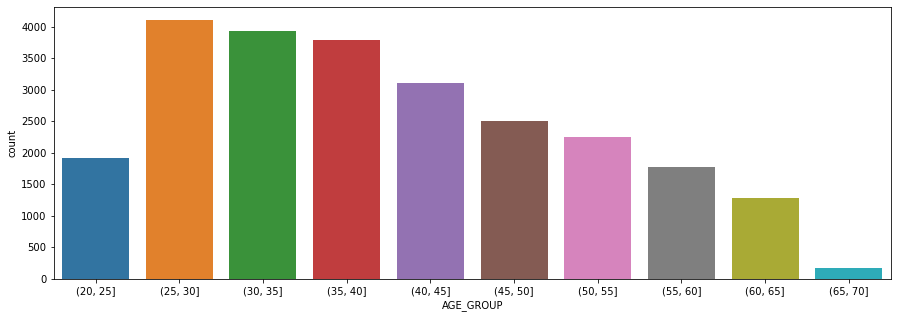

In [78]:
#For Defaulter
plt.figure(figsize=[15,5])
sns.countplot(data=default, x='AGE_GROUP')
plt.show()

In [79]:
#in this case we that age group of (25,30] are more default.

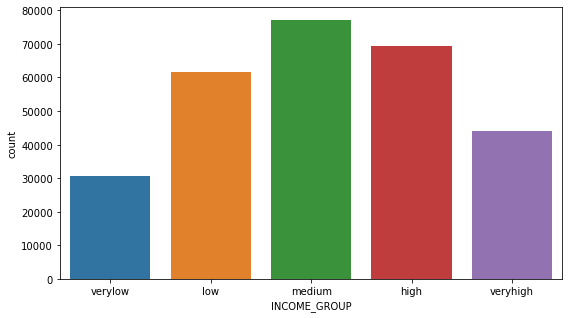

In [80]:
#Now we check next for INCOME_GROUP
plt.figure(figsize=[9,5])
sns.countplot(data=ndefault, x='INCOME_GROUP')
plt.show()

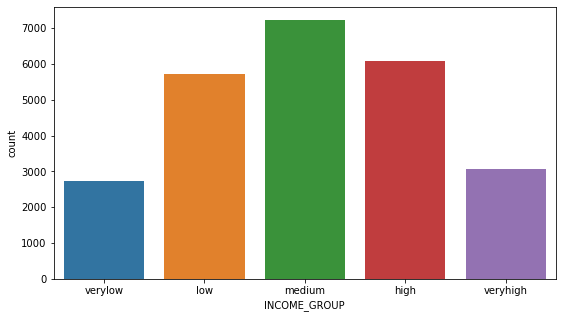

In [81]:
#for defaulter
plt.figure(figsize=[9,5])
sns.countplot(data=default, x='INCOME_GROUP')
plt.show()

In [82]:
#very high income_group tend to default less foten.
#medium income_group tend for default.

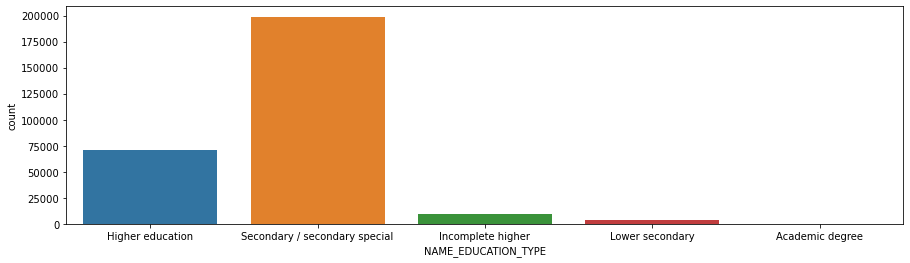

In [83]:
#NAME_EDUCATION_TYPE
plt.figure(figsize=[15,4])
sns.countplot(data=ndefault, x='NAME_EDUCATION_TYPE')
plt.show()

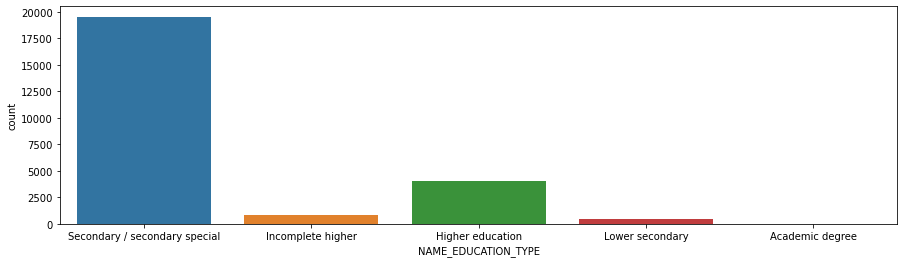

In [84]:
plt.figure(figsize=[15,4])
sns.countplot(data=default, x='NAME_EDUCATION_TYPE')
plt.show()

In [85]:
#here in EDUCATION_TYPE we can see secondary/secondary special are more default to others.

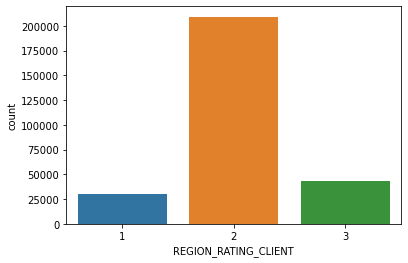

In [86]:
#REGION_RATING_CLIENT
plt.figure(figsize=[6,4])
sns.countplot(data=ndefault, x='REGION_RATING_CLIENT')
plt.show()

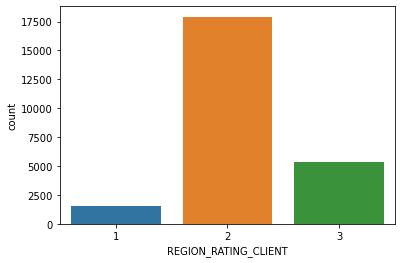

In [87]:
#fro defaulter
plt.figure(figsize=[6,4])
sns.countplot(data=default, x='REGION_RATING_CLIENT')
plt.show()

In [88]:
#More people from secong tier regions tend to apply for loans

### Checking Correlation

In [89]:
corr = ndefault.corr()
corr.head(10)

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
SK_ID_CURR,1.000000,NaN,-0.000349,0.001738,-0.001190,0.001739,-0.001475,0.000227,-0.002778,-0.000730,0.001940,0.004065,-0.001725,0.000068,0.001142,0.000060,-0.000511,-0.000215
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,-0.000349,NaN,1.000000,0.342801,0.648589,-0.072518,0.013479,0.017072,0.064544,-0.112235,-0.032469,-0.033372,0.004408,0.054080,0.017765,0.771308,-0.103334,0.987253
AMT_INCOME_TOTAL,0.001738,NaN,0.342801,1.000000,-0.225923,-0.141249,0.064941,0.083706,0.034259,-0.200470,-0.025944,-0.026551,0.007862,0.061473,0.013125,0.418954,-0.186577,0.349461
CREDIT_INCOME_RATIO,-0.001190,NaN,0.648589,-0.225923,1.000000,0.074669,-0.044292,-0.052584,0.047823,0.063596,-0.005456,-0.005655,-0.000890,-0.000294,0.002457,0.391499,0.060786,0.628749
DAYS_EMPLOYED,0.001739,NaN,-0.072518,-0.141249,0.074669,1.000000,-0.210188,-0.063924,-0.237411,0.040031,0.029375,0.025415,-0.000803,-0.035561,0.015287,-0.106429,0.037854,-0.071054
DAYS_REGISTRATION,-0.001475,NaN,0.013479,0.064941,-0.044292,-0.210188,1.000000,0.035469,0.175622,0.069368,-0.007900,-0.005713,-0.000035,-0.011867,-0.000527,0.039438,0.075857,0.015919
FLAG_EMAIL,0.000227,NaN,0.017072,0.083706,-0.052584,-0.063924,0.035469,1.000000,0.019026,-0.052676,-0.001200,0.000116,0.004396,0.024416,0.011990,0.071269,-0.053766,0.017248
CNT_FAM_MEMBERS,-0.002778,NaN,0.064544,0.034259,0.047823,-0.237411,0.175622,0.019026,1.000000,0.028659,-0.023157,-0.020843,0.000181,-0.007833,-0.004154,0.075796,0.027875,0.062824
REGION_RATING_CLIENT_W_CITY,-0.000730,NaN,-0.112235,-0.200470,0.063596,0.040031,0.069368,-0.052676,0.028659,1.000000,-0.004053,0.002716,-0.002665,-0.067873,0.004670,-0.145151,0.950148,-0.112599


In [90]:
corr = default.corr()
corr.head(10)

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
SK_ID_CURR,1.000000,NaN,-0.001290,-0.010165,-0.008207,-0.005151,0.006342,0.000831,-0.003816,-0.004135,0.004941,-0.003692,-0.007954,0.006436,-0.000880,-0.007578,-0.005936,-0.001816
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,-0.001290,NaN,1.000000,0.038131,0.639744,-0.000968,-0.025854,0.010157,0.051224,-0.071377,-0.052142,-0.055499,0.003008,0.055038,-0.017467,0.752195,-0.059193,0.983103
AMT_INCOME_TOTAL,-0.010165,NaN,0.038131,1.000000,-0.043706,-0.014979,0.000158,0.009889,0.006654,-0.022808,-0.040236,-0.038942,-0.000272,0.004114,-0.001133,0.046421,-0.021486,0.037583
CREDIT_INCOME_RATIO,-0.008207,NaN,0.639744,-0.043706,1.000000,0.119095,-0.056299,-0.056058,0.056291,0.066909,-0.021460,-0.025251,-0.000933,-0.000042,-0.033683,0.381298,0.066898,0.623163
DAYS_EMPLOYED,-0.005151,NaN,-0.000968,-0.014979,0.119095,1.000000,-0.188929,-0.040055,-0.186561,0.002992,0.010055,0.009638,0.021363,-0.025738,0.014982,-0.082552,0.003679,0.003587
DAYS_REGISTRATION,0.006342,NaN,-0.025854,0.000158,-0.056299,-0.188929,1.000000,0.022483,0.145828,0.100285,0.005857,0.008203,-0.008367,0.004876,-0.012457,0.034279,0.103855,-0.025679
FLAG_EMAIL,0.000831,NaN,0.010157,0.009889,-0.056058,-0.040055,0.022483,1.000000,0.007951,-0.028632,-0.014210,-0.019513,-0.002951,0.044984,0.035230,0.078188,-0.032124,0.013697
CNT_FAM_MEMBERS,-0.003816,NaN,0.051224,0.006654,0.056291,-0.186561,0.145828,0.007951,1.000000,0.047883,-0.033209,-0.038528,-0.018203,-0.009169,-0.012842,0.075711,0.043652,0.047388
REGION_RATING_CLIENT_W_CITY,-0.004135,NaN,-0.071377,-0.022808,0.066909,0.002992,0.100285,-0.028632,0.047883,1.000000,-0.024511,-0.018732,0.004846,-0.057526,0.008478,-0.089291,0.956637,-0.077191


### Bivariate analysis

### Scatter plot for continuous variable

In [91]:
?sns.scatterplot

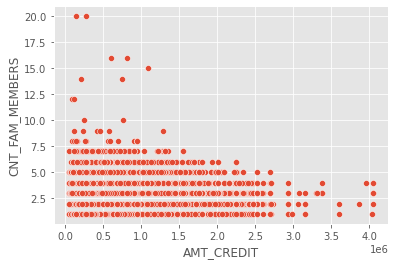

In [92]:
#for non-defaulter
plt.style.use('ggplot')
sns.scatterplot(data=ndefault, x='AMT_CREDIT', y='CNT_FAM_MEMBERS')
plt.show()

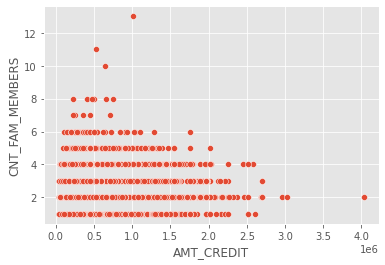

In [93]:
#for defaulter
plt.style.use('ggplot')
sns.scatterplot(data=default, x='AMT_CREDIT', y='CNT_FAM_MEMBERS')
plt.show()

In [94]:
#we can see here the density in lower left corner is almost same in both analysis, so people are equally default if they belongs to small family and AMT_CREDIT is low

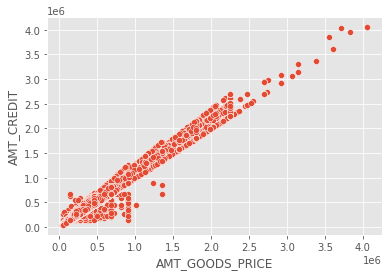

In [95]:
plt.style.use('ggplot')
sns.scatterplot(data=ndefault, x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.show()

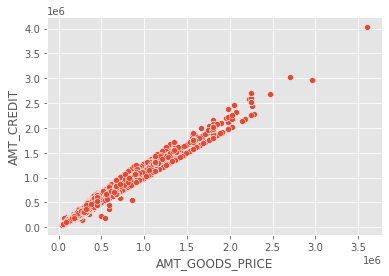

In [96]:
plt.style.use('ggplot')
sns.scatterplot(data=default, x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.show()

### Now we move to Previous Application Data

In [121]:
inp1 = pd.read_csv("previous_application.csv")

In [122]:
inp1.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
inp1.shape

(1670214, 37)

In [125]:
inp1 = inp1.loc[:,inp1.isnull().mean()<=0.5]
inp1.shape

(1670214, 33)

### Univariate analysis

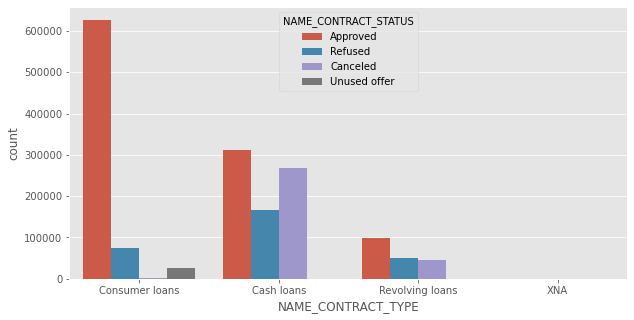

In [126]:
plt.figure(figsize=[10,5])
sns.countplot(data=inp1, x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS')
plt.show()

In [127]:
#here we can see that most of application are for 'cash loan' and 'consumer loan'

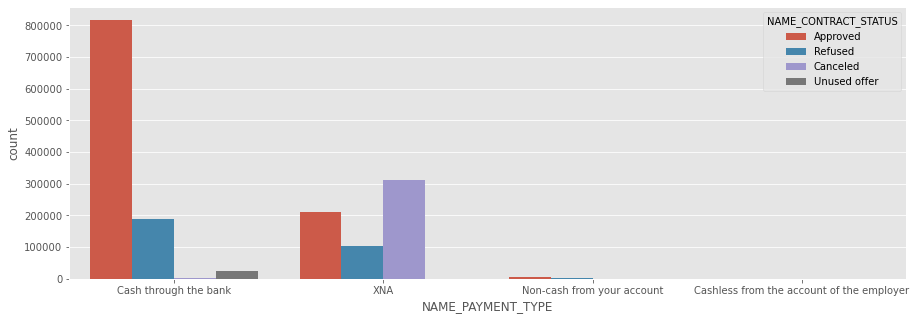

In [142]:
plt.figure(figsize=[15,5])
sns.countplot(data=inp1, x='NAME_PAYMENT_TYPE',hue='NAME_CONTRACT_STATUS')
plt.show()

In [140]:
# most of th client dhose to repay the loan using cash through the bank
# and here we can also see 'Non-cash from your account' and 'Cashless from the account of the employer' are never use to repay the loan.

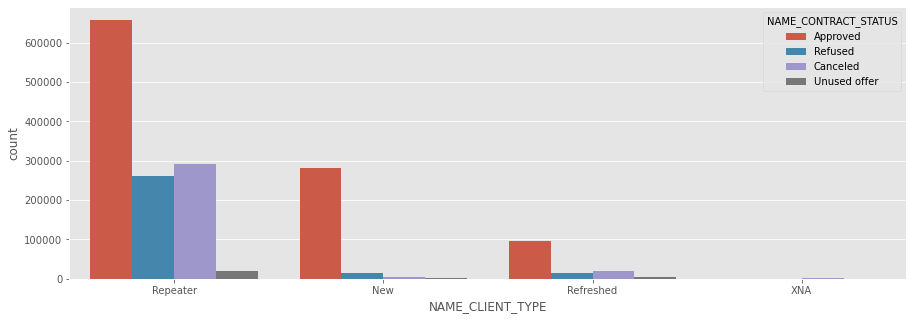

In [143]:
plt.figure(figsize=[15,5])
sns.countplot(data=inp1, x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS')
plt.show()

In [144]:
#most of the loan application are from repeat customer

### Cheking Correlation 

In [146]:
corr = inp1.corr()

In [147]:
corr.head(10)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,-0.000321,0.011459,0.003302,0.003659,0.015293,-0.002652,-0.002828,0.019100,-0.001079,0.015589,-0.001478,-0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,-0.000321,1.000000,0.000577,0.000280,0.000195,0.000369,0.002842,0.000098,-0.000637,0.001265,0.000031,-0.001329,-0.000757,0.000252,-0.000318,-0.000020,0.000876
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.820895,-0.036201,0.020639,0.279051,-0.015027,0.394535,0.052839,-0.053295,-0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.003302,0.000280,0.808872,1.000000,0.975824,0.999884,-0.014415,0.004310,0.133660,-0.007649,0.680630,0.074544,-0.049532,-0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.003659,0.000195,0.816429,0.975824,1.000000,0.993087,-0.021039,-0.025179,0.133763,-0.009567,0.674278,-0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,1.000000,-0.045267,-0.017100,0.290422,-0.015842,0.672129,-0.024445,-0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,-0.002652,0.002842,-0.036201,-0.014415,-0.021039,-0.045267,1.000000,0.005789,-0.039962,0.015671,-0.055511,0.014321,-0.002797,-0.016567,-0.018018,-0.018254,-0.117318
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000098,0.020639,0.004310,-0.025179,-0.017100,0.005789,1.000000,0.016555,0.000912,0.063347,-0.000409,-0.002288,-0.001981,-0.002277,-0.000744,-0.007124
DAYS_DECISION,0.019100,-0.000637,0.279051,0.133660,0.133763,0.290422,-0.039962,0.016555,1.000000,-0.018382,0.246453,-0.012007,0.176711,0.089167,0.448549,0.400179,-0.028905
SELLERPLACE_AREA,-0.001079,0.001265,-0.015027,-0.007649,-0.009567,-0.015842,0.015671,0.000912,-0.018382,1.000000,-0.010646,0.007401,-0.002166,-0.007510,-0.006291,-0.006675,-0.018280


### Bivariate analysis using pairplot 

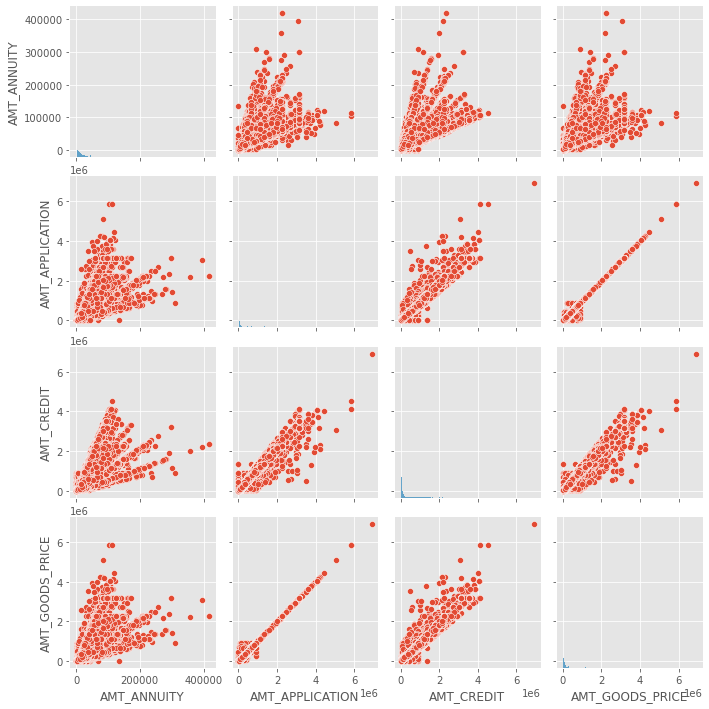

In [150]:
sns.pairplot(inp1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']])
plt.show()

In [151]:
### Bivariate analysis on categorical and numeric columns

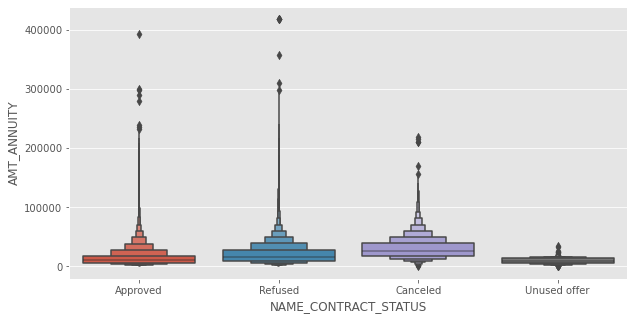

In [160]:
plt.figure(figsize=[10,5])
sns.boxenplot(data=inp1, x='NAME_CONTRACT_STATUS', y='AMT_ANNUITY')
plt.show()

In [159]:
# we can see application for people with lower AMT_ANNUITY gets canceled.
# we also see that application with too high AMT_ANNUITY also got refused more f=often then other

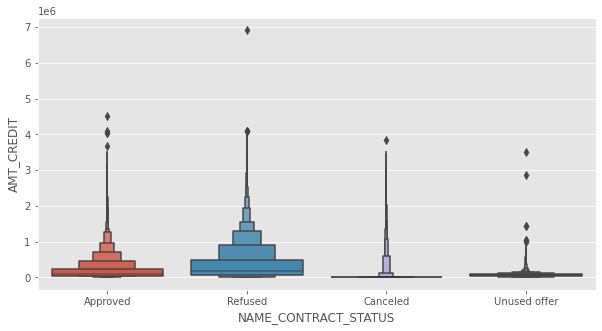

In [161]:
plt.figure(figsize=[10,5])
sns.boxenplot(data=inp1, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT')
plt.show()

In [ ]:
#here we can see that AMT_CREDIT is too low the it's get cancelled.